### Table of contents
# 5. Machine Learning: Clustering
### 5.1 Import assets
### 5.2 Data preprocessing
### 5.3 The Elbow Technique
### 5.4 K-means clustering
### 5.5 Visualizations
### 5.6 Descriptive Statistics
### 5.7 Conclusions

# 5.1 Import assets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler # For data preprocessing, here specifically for standarization.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Path to import datasets
path = r'C:\Users\raque\Documents\Achievement 6\Forbes billionaires 1997-2023 analysis'

In [4]:
# Import datasets
df_billio = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'all_billionaires_1997_2023_clean.csv'), index_col = False)

In [5]:
df_billio.shape

(31731, 14)

In [6]:
df_billio.head()

,year,rank,net_worth_billions,full_name,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,1997,1,2.0,Chatri Sophonpanich & family,73.0,Male,Thailand,Thailand,Bangkok,['Finance and Investments'],NaN,NaN,False,NaN
1,1997,2,1.8,King Bhumibol Adulyadej,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1998,1,3.3,Edmond Safra,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,NaN,True,NaN
3,1999,1,7.1,Dieter Schwarz,59.0,Male,Germany,Germany,Neckarsulm,['Fashion & Retail'],NaN,NaN,True,NaN
4,1999,2,2.9,Martin Ebner,53.0,Male,Switzerland,Switzerland,Wilen,['Finance and Investments'],NaN,NaN,False,NaN


# 5.2 Data preprocessing

In [7]:
df_billio.columns

Index(['year', 'rank', 'net_worth_billions', 'full_name', 'age', 'gender',
       'country_of_citizenship', 'country_of_residence', 'city_of_residence',
       'business_industries', 'organization_name', 'position_in_organization',
       'self_made', 'wealth_status'],
      dtype='object')

In [8]:
# Filtering year 2023
df_2023 = df_billio.loc[df_billio['year'] == 2023]

In [9]:
df_2023.shape

(2640, 14)

In [10]:
# Create a subset for 2023 with the relevant data for the relations analysis
sub2023 = df_billio[['net_worth_billions', 'age']]

In [11]:
# Filtering age 0 out (inheritances) out
sub_2023 = sub2023.loc[sub2023['age'] > 1]

In [12]:
sub_2023.shape

(30848, 2)

In [13]:
sub_2023.head()

,net_worth_billions,age
0,2.0,73.0
1,1.8,69.0
2,3.3,65.0
3,7.1,59.0
4,2.9,53.0


In [14]:
# Check for missing values
sub_2023.isnull().sum()

net_worth_billions    0
age                   0
dtype: int64

In [15]:
# Impute missing values with median
sub_2023['age'].fillna(sub_2023['age'].median(), inplace=True)

C:\Users\raque\AppData\Local\Temp\ipykernel_1836\2045718345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_2023['age'].fillna(sub_2023['age'].median(), inplace=True)


In [16]:
# Check for missing values
sub_2023.isnull().sum()

net_worth_billions    0
age                   0
dtype: int64

### Data standarization 

In [17]:
# define standard scaler 
scaler = StandardScaler() 

In [18]:
# transform data 
df_stand = scaler.fit_transform(sub_2023) 

In [19]:
df_stand

array([[-0.28308132,  0.73532805],
       [-0.31096779,  0.43336888],
       [-0.10181925,  0.1314097 ],
       ...,
       [-0.42251367, -0.24603927],
       [-0.42251367,  0.58434846],
       [-0.42251367,  0.20689949]])

# 5.3 The Elbow Technique

In [20]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
score = [kmeans[i].fit(df_stand).score(df_stand) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\raque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\raque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\raque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\raque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-61696.00000000003,
 -40883.14985893253,
 -24045.842857847696,
 -18573.170127699104,
 -13816.348998604957,
 -11587.349254654308,
 -9600.712709146672,
 -8520.292386084408,
 -7559.203637980051]

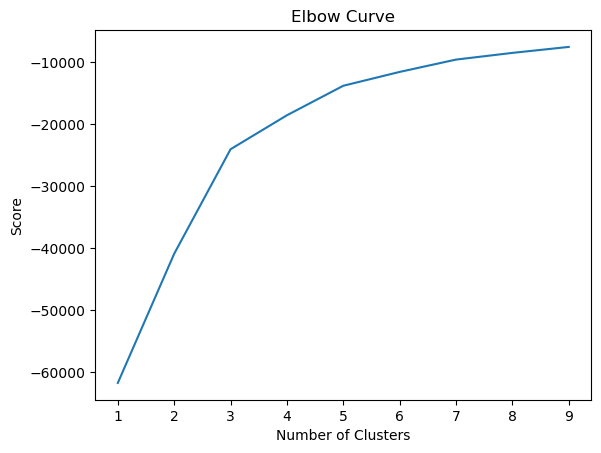

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a large jump from 3 to 5 on the x-axis, this is called the elbow or breaking point of the curve. After that, the curve straightens out. That's why the optimal number of clusters is 5.

# 5.4 K-means clustering

In [23]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 5) 

In [24]:
# Fit the k-means object to the data.
kmeans.fit(df_stand)

C:\Users\raque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

### Attaching a new column to the df with cluster results

In [25]:
# converting df_stand array back to dataframe
df = pd.DataFrame(df_stand, columns=['net_worth_billions', 'age'])

In [26]:
df.head()

,net_worth_billions,age
0,-0.283081,0.735328
1,-0.310968,0.433369
2,-0.101819,0.131410
3,0.428024,-0.321529
4,-0.157592,-0.774468


In [27]:
# Create column in dataframe with values corresponding to clusters 
sub_2023['clusters'] = kmeans.fit_predict(df)

C:\Users\raque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\raque\AppData\Local\Temp\ipykernel_1836\3624536639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_2023['clusters'] = kmeans.fit_predict(df)


In [28]:
# Check the dataframe to see the new column 
sub_2023.head()

,net_worth_billions,age,clusters
0,2.0,73.0,4
1,1.8,69.0,0
2,3.3,65.0,0
3,7.1,59.0,0
4,2.9,53.0,1


In [29]:
# Count the clusers 
sub_2023['clusters'].value_counts()

clusters
0    12283
1     9584
4     7564
3     1256
2      161
Name: count, dtype: int64

In [30]:
#Exporting subset of 2023 with numerical data and clusters
sub_2023.to_csv(os.path.join(path, '02 Data','Prepared Data', 'clusters_2023.csv'))

# 5.5 Visualizations

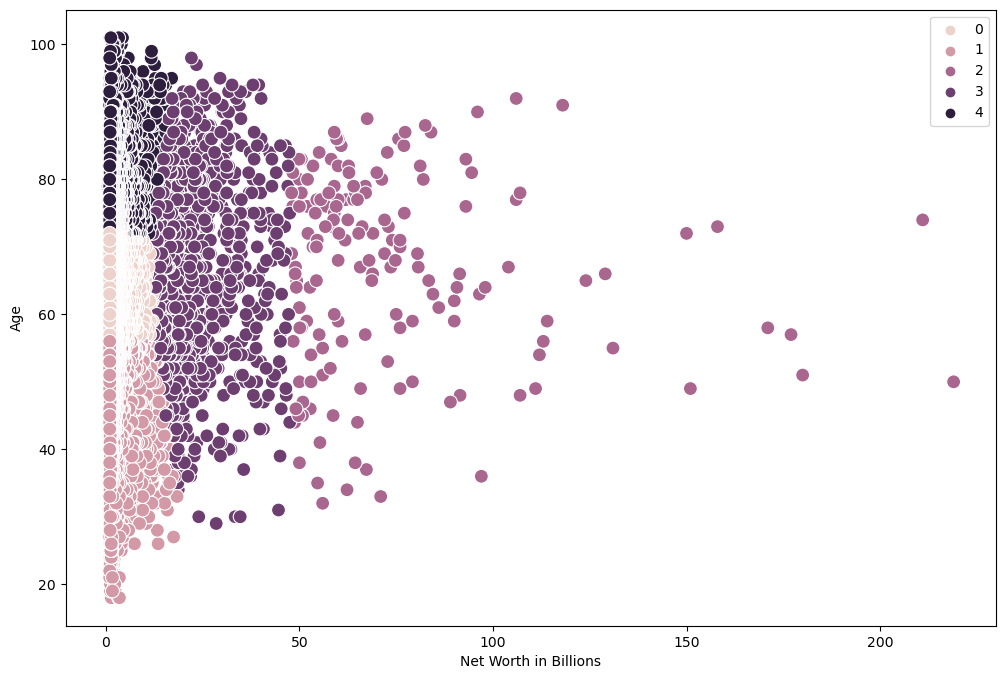

In [31]:
# Plot the clusters for the "Age" and "Net worth billions" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_2023['net_worth_billions'], y=sub_2023['age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Net Worth in Billions') # Label x-axis.
plt.ylabel('Age') # Label y-axis.
plt.show()

- Cluster 0 (beige): Young people with 0-3 billion net worth.
- Cluster 4 (black): Middle aged with 0-3 billion net worth.
- Cluster 1 (light pink): Older people with 0-3 billion net worth
- Cluster 2 (pink): Represent the richest people independently of the age. 
- Cluster 3 (purple): The people with 3-7 billions net worth of all ages. 

It's sepparated the people in age groups where there was more data points and it hasn't differentiate by age in higher fortunes with less data points. 

# 5.6 Descriptive Statistics

In [32]:
sub_2023.loc[sub_2023['clusters'] == 4, 'cluster'] = 'black 4'
sub_2023.loc[sub_2023['clusters'] == 3, 'cluster'] = 'purple 3 '
sub_2023.loc[sub_2023['clusters'] == 2, 'cluster'] = 'pink 2'
sub_2023.loc[sub_2023['clusters'] == 1, 'cluster'] = 'light pink 1'
sub_2023.loc[sub_2023['clusters'] == 0, 'cluster'] = 'beige 0'

C:\Users\raque\AppData\Local\Temp\ipykernel_1836\286083643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_2023.loc[sub_2023['clusters'] == 4, 'cluster'] = 'black 4'


In [33]:
sub_2023.groupby('cluster').agg({'net_worth_billions':['mean', 'median', 'max', 'min'], 
                         'age':['mean', 'median', 'max', 'min']})

net_worth_billions                            age                \
                           mean median    max   min       mean median    max   
cluster                                                                        
beige 0                2.737161    2.0   12.1   1.0  64.195229   64.0   72.0   
black 4                3.412742    2.5   17.0   0.6  80.108540   79.0  101.0   
light pink 1           2.744668    1.9   18.4   1.0  48.385538   50.0   56.0   
pink 2                74.323602   64.5  219.0  48.0  66.670807   69.0   92.0   
purple 3              21.193750   18.6   47.5  12.0  65.691879   65.0   98.0   

                    
               min  
cluster             
beige 0       57.0  
black 4       71.0  
light pink 1  18.0  
pink 2        32.0  
purple 3      29.0

The clusters divided by age range (0, 4, 1) comprise the billionaires with net worth between 0.6B and 20B. The net worth mean is between 2.7B and 3.3B. And the median between 1.85B and 2.40B. Indicating a majority of "lower" fortunes, around 3 billions. 
In the younger cluster (0) the age mean is 45 years, and in a age range of 0-53. This indicates there aren't many billionaires under 40. The next cluster (4) the age mean is 61, with people between the ages of 54 and 70. And the last age divided cluster (1) has a mean of 78 years, and covers an age range of 70-101 years. 

The last two clusters aren't divided by age but have the billionaires with the highest fortunes. In cluster 2, the age range is quite broad (29-98) with a mean of 65, so we can assume a majority of older people. This cluster net worth range is 11.5B-46.6B with a mean of 20B. And the last cluster, has a net worht range of 47B-219B with a mean of 73B. And an age range of 32-92 years with a mean of 66 years. 

# 5.7 Conclusions

It's interesting the way it's categorized by age the majority of billionaire and left the wealthiest as 2 subgroups, for having a smaller amount of samples and being more unique. 

We can see in the statistics that the billionaire population is in it's majority quite aged, with the lowest mean at 45 years. 

The majority of billionaires have a net worth of less than 20B. With a selected group over 20B and over 50B. With a maximum of 219B. 

In that sense we can take that the group divided in age ranges could be explored and analyzed on its own independently of the fortunes over 20B. On one hand, to avoid skewing the data, and on the other hand, to get insights in the vast majority of billionaires sepprately from the top over 20B or even 50B. 